<a href="https://colab.research.google.com/github/fsajad9/Power_flow/blob/main/IPM4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [152]:
import numpy as np
import matplotlib.pyplot as plt

In [153]:
def clas(A,b,c,y,x,s,ep,gap,thet,Z1,Z2,Z3,I,zv,eee,alp,m,mu):
  f1=[gap]
  k=0
  mu=mu
  u=[]
  u.append(np.dot(c.T,x))
  while gap>ep:
    k+=1
    mu=mu*(1-thet)
    #mu=np.dot(x.T,s)/4
    X=np.diag(x)
    S=np.diag(s)
    M=np.block([[A,Z1,Z2.T],[Z3,A.T,I],[S,Z2,X]])
    B=np.block([zv,zv,zv,mu*eee-x*s])
    sol=np.dot(np.linalg.inv(M),B.T)
    x=x+alp*sol[0:2*m]
    y=y+alp*sol[2*m:3*m]
    s=s+alp*sol[3*m:]
    f1.append(gap)
    gap=np.dot(c.T,x)-np.dot(b.T,y)
    print([np.dot(c.T,x),np.dot(b.T,y)])
    u.append(np.dot(c.T,x))
  return gap,k,f1,u

In [154]:
def BB(x,s,mu,m):
  zv=np.zeros(m)
  eee=np.array([1 for i in range(2*m)])
  return np.block([zv,zv,zv,mu*eee-x*s])
def MM(A,Z1,Z2,Z3,I,x,s):
  X=np.diag(x)
  S=np.diag(s)
  return np.block([[A,Z1,Z2.T],[Z3,A.T,I],[S,Z2,X]])

In [205]:
def impro(A,b,c,y,x,s,ep,gap,thet,Z1,Z2,Z3,I,zv,eee,alp,m,mu):
  f2=[gap]
  k=0
  u=[]
  u.append(np.dot(c.T,x))
  while k<10:
    if k==0:
      mu=mu*(1-thet)
      M=MM(A,Z1,Z2,Z3,I,x,s)
      B=BB(x,s,mu,m)
      sol=np.dot(np.linalg.inv(M),B.T)
      xx=x+alp*sol[0:2*m]
      yy=y+alp*sol[2*m:3*m]
      ss=s+alp*sol[3*m:]
      M=MM(A,Z1,Z2,Z3,I,0.5*(x+xx),0.5*(s+ss))
      B=BB(x,s,0,m)
      sol=np.dot(np.linalg.inv(M),B.T)
      x=x+alp*sol[0:2*m]
      y=y+alp*sol[2*m:3*m]
      s=s+alp*sol[3*m:]
      gap=np.dot(c.T,x)-np.dot(b.T,y)
      tt=np.dot(c.T,x)
    else:
      mu=mu*(1-thet)
      #mu=np.dot(x.T,s)/4
  
      M=MM(A,Z1,Z2,Z3,I,0.5*(x+xx),0.5*(s+ss))
      B=BB(x,s,mu,m)
      sol=np.dot(np.linalg.inv(M),B.T)
      xx=x+alp*sol[0:2*m]
      yy=y+alp*sol[2*m:3*m]
      ss=s+alp*sol[3*m:]
       # mu=mu*(1-thet)
      M=MM(A,Z1,Z2,Z3,I,0.5*(x+xx),0.5*(s+ss))
      B=BB(x,s,0,m)
      sol=np.dot(np.linalg.inv(M),B.T)
      x=x+alp*sol[0:2*m]
      y=y+alp*sol[2*m:3*m]
      s=s+alp*sol[3*m:]
      tt=np.dot(c.T,x)
    f2.append(gap)
    gap=np.dot(c.T,x)-np.dot(b.T,y)
    k=k+1
    print([np.dot(c.T,x),np.dot(b.T,y)])
    u.append(tt)
  return gap,k,f2,u  


In [206]:
m=10
n=2*m
I1=np.eye(m)
A=np.block([I1,I1])
ee=np.array([1 for i in range(m)])
b=2*ee
zv=np.zeros(m)
c=np.block([-ee,zv])
y=-2*ee
s=np.block([ee,2*ee])
x=np.block([ee,ee])
Z1=np.zeros((m,m))
Z2=np.zeros((2*m,m))
Z3=np.zeros((2*m,2*m))
ep=10**(-6)
I=np.eye(2*m)
mu=1
thet=1/np.sqrt(n)
gap=np.dot(c.T,x)-np.dot(b.T,y)
alp=1
eee=np.array([1 for i in range(2*m)])

In [207]:
gap1,k1,f1,u1=clas(A,b,c,y,x,s,ep,gap,thet,Z1,Z2,Z3,I,zv,eee,alp,m,mu)

[-13.333333333333336, -28.861197378333756]
[-15.527708570259797, -27.58343666026064]
[-16.29379638717443, -25.653781724425716]
[-16.961338207316096, -24.22836719631786]
[-17.540081488114808, -23.182153395729625]
[-18.028354038578282, -22.408820314256236]
[-18.431608730481752, -21.832572969603586]
[-18.75949927064958, -21.399984786999187]
[-19.02308325853996, -21.073138264073425]
[-19.23319186675849, -20.82484063729331]
[-19.399623675491394, -20.635368961304227]
[-19.530836499436425, -20.490260739054023]
[-19.63391408973902, -20.378804547452024]
[-19.71466964095446, -20.29299752874374]
[-19.777806012025014, -20.22681585277623]
[-19.82708894076017, -20.17569712886278]
[-19.86551120184484, -20.13616822933641]
[-19.89543803577514, -20.105574312060785]
[-19.918730928264363, -20.081879304718672]
[-19.93685027548483, -20.063517565922087]
[-19.950939053507213, -20.049282676750128]
[-19.96189016779033, -20.038243488360767]
[-19.970400183555576, -20.029680382615677]
[-19.977011910318193, -20.023

In [208]:
gap2,k2,f2,u2=impro(A,b,c,y,x,s,ep,gap,thet,Z1,Z2,Z3,I,zv,eee,alp,m,mu)


[-15.747728658722107, -15.747728658722107]
[-19.41716705578048, -19.417167055780485]
[-19.96553029651132, -19.96553029651132]
[-19.998670995442488, -19.998670995442488]
[-19.999968040851037, -19.999968040851037]
[-19.999999525358675, -19.999999525358675]
[-19.999999995685762, -19.999999995685762]
[-19.99999999997614, -19.99999999997614]
[-19.999999999999922, -19.999999999999925]
[-20.0, -20.0]


In [209]:
print([k1,k2])

[67, 10]


In [210]:
s1=min(u1)
s2=min(u2)
s=min(s1,s2)
f1=u1-s+10**(-11)
f2=u2-s+10**(-11)

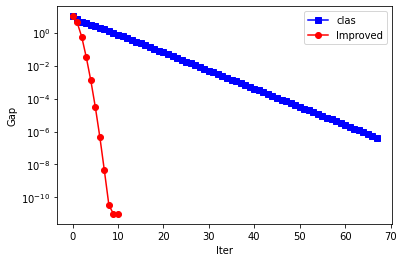

In [211]:
plt.plot(f1,'s-',label='clas',color='blue')
plt.plot(f2,'o-',label='Improved',color='red')
plt.xlabel('Iter')
plt.ylabel('Gap')
plt.legend()
plt.yscale('log')
plt.show()